<a href="https://colab.research.google.com/github/mb16biswas/cat_vs_dog_classifier-/blob/main/cats_vs_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf

In [4]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()

# Define our example directories and files
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats') # Directory with our training cat pictures
train_dogs_dir = os.path.join(train_dir, 'dogs') # Directory with our training dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats') # Directory with our validation cat pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')# Directory with our validation dog pictures

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)


--2021-02-11 16:11:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.12.240, 172.253.62.128, 172.217.2.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.12.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M  97.9MB/s    in 0.7s    

2021-02-11 16:11:15 (97.9 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     


validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [6]:
print(train_generator)

In [8]:
IMG_SIZE = 224
IMG_SHAPE = (IMG_SIZE, IMG_SIZE, 3)

# Create the base model from the pre-trained model MobileNet V2
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')

In [9]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [10]:
base_model.trainable = False

In [11]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
_______________________________________________________________________________

In [12]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()

In [13]:
prediction_layer = tf.keras.layers.Dense(1 , activation='sigmoid')

In [14]:
model = tf.keras.Sequential([
  base_model,
  global_average_layer,
  prediction_layer
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [16]:
model.compile(loss='binary_crossentropy',
              optimizer="adam",
              metrics=['accuracy'])

In [17]:
history = model.fit(
      train_generator,
      validation_data= validation_generator , 
      steps_per_epoch=8,  
      epochs= 30,
      verbose=1)

Epoch 1/30
8/8 [==============================] - 13s 618ms/step - loss: 0.9591 - accuracy: 0.5056 - val_loss: 0.6020 - val_accuracy: 0.7400
Epoch 2/30
8/8 [==============================] - 4s 527ms/step - loss: 0.6646 - accuracy: 0.6854 - val_loss: 0.3341 - val_accuracy: 0.8510
Epoch 3/30
8/8 [==============================] - 4s 539ms/step - loss: 0.4651 - accuracy: 0.7434 - val_loss: 0.2418 - val_accuracy: 0.9030
Epoch 4/30
8/8 [==============================] - 4s 532ms/step - loss: 0.3320 - accuracy: 0.8126 - val_loss: 0.2138 - val_accuracy: 0.9100
Epoch 5/30
8/8 [==============================] - 4s 539ms/step - loss: 0.2583 - accuracy: 0.8791 - val_loss: 0.1901 - val_accuracy: 0.9200
Epoch 6/30
8/8 [==============================] - 4s 541ms/step - loss: 0.2987 - accuracy: 0.8837 - val_loss: 0.1832 - val_accuracy: 0.9270
Epoch 7/30
8/8 [==============================] - 4s 533ms/step - loss: 0.3614 - accuracy: 0.8588 - val_loss: 0.1692 - val_accuracy: 0.9240
Epoch 8/30
8/8 [===

In [18]:
acc = history.history['accuracy']
print(acc)

[0.581250011920929, 0.731249988079071, 0.7437499761581421, 0.824999988079071, 0.862500011920929, 0.8999999761581421, 0.862500011920929, 0.925000011920929, 0.90625, 0.875, 0.893750011920929, 0.90625, 0.8999999761581421, 0.9312499761581421, 0.9437500238418579, 0.9375, 0.893750011920929, 0.949999988079071, 0.918749988079071, 0.90625, 0.918749988079071, 0.8999999761581421, 0.8687499761581421, 0.9375, 0.9375, 0.925000011920929, 0.925000011920929, 0.8999999761581421, 0.9312499761581421, 0.9312499761581421]


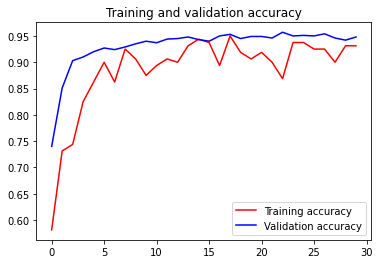

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [20]:
model.save("dogs_vs_cats.h5")


In [22]:
new_model = tf.keras.models.load_model('dogs_vs_cats.h5')

In [32]:

#prediction for costume images
 

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  

  images = np.vstack([x])
  images = images/255.0
  classes = new_model.predict(images, batch_size=20)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat ")

Saving golden-retriever-royalty-free-image-506756303-1560962726.jpg to golden-retriever-royalty-free-image-506756303-1560962726 (1).jpg
[0.96933204]
golden-retriever-royalty-free-image-506756303-1560962726.jpg is a dog
